In [116]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, tree, export_graphviz
import matplotlib
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_curve,auc
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn import tree

In [117]:
df = pd.read_excel('data_dt.xlsx')

In [118]:
df.head()

,Outlook,Temperature,Humidity,Wind,Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cold,Normal,Weak,Yes


In [119]:
df

,Outlook,Temperature,Humidity,Wind,Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cold,Normal,Weak,Yes
5,Rain,Cold,Normal,Strong,No
6,Overcast,Cold,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cold,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [120]:
df.shape

(14, 5)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Golf         14 non-null     object
dtypes: object(5)
memory usage: 344.0+ bytes


In [122]:
df.describe()

,Outlook,Temperature,Humidity,Wind,Golf
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rain,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [123]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
Golf           object
dtype: object

In [124]:
df.head()

,Outlook,Temperature,Humidity,Wind,Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cold,Normal,Weak,Yes


In [125]:
df = pd.get_dummies(df, columns=['Outlook','Temperature','Humidity','Wind'])

In [126]:
df.head()

,Golf,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cold,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,No,0,0,1,0,1,0,1,0,0,1
1,No,0,0,1,0,1,0,1,0,1,0
2,Yes,1,0,0,0,1,0,1,0,0,1
3,Yes,0,1,0,0,0,1,1,0,0,1
4,Yes,0,1,0,1,0,0,0,1,0,1


In [127]:
lb = LabelEncoder()

In [128]:
df.Golf = lb.fit_transform(df.Golf)

In [129]:
df

,Golf,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cold,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,0,1,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,1,0,1,0
2,1,1,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,0,1,1,0,0,1
4,1,0,1,0,1,0,0,0,1,0,1
5,0,0,1,0,1,0,0,0,1,1,0
6,1,1,0,0,1,0,0,0,1,1,0
7,0,0,0,1,0,0,1,1,0,0,1
8,1,0,0,1,1,0,0,0,1,0,1
9,1,0,1,0,0,0,1,0,1,0,1


In [130]:
X = df.drop(columns='Golf', axis=1)

Y = df.Golf

In [131]:
print(X.shape)
print(Y.shape)

(14, 10)
(14,)


In [137]:
params = {
    'max_depth' : [1,2,4,5,7],
    'min_samples_split' : [1,2,4,5,7],
    'criterion' : ['gini','entropy']
}

dt = DecisionTreeClassifier()
model_grid = GridSearchCV(dt, param_grid = params, cv=3)
model_grid.fit(X, Y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 5, 7],
                         'min_samples_split': [1, 2, 4, 5, 7]})

In [138]:
model_grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [143]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=4,min_samples_split=2)
model_dt.fit(X, Y)

DecisionTreeClassifier(max_depth=4)

In [144]:
df.Golf.unique()

array([0, 1])

<IPython.core.display.Javascript object>

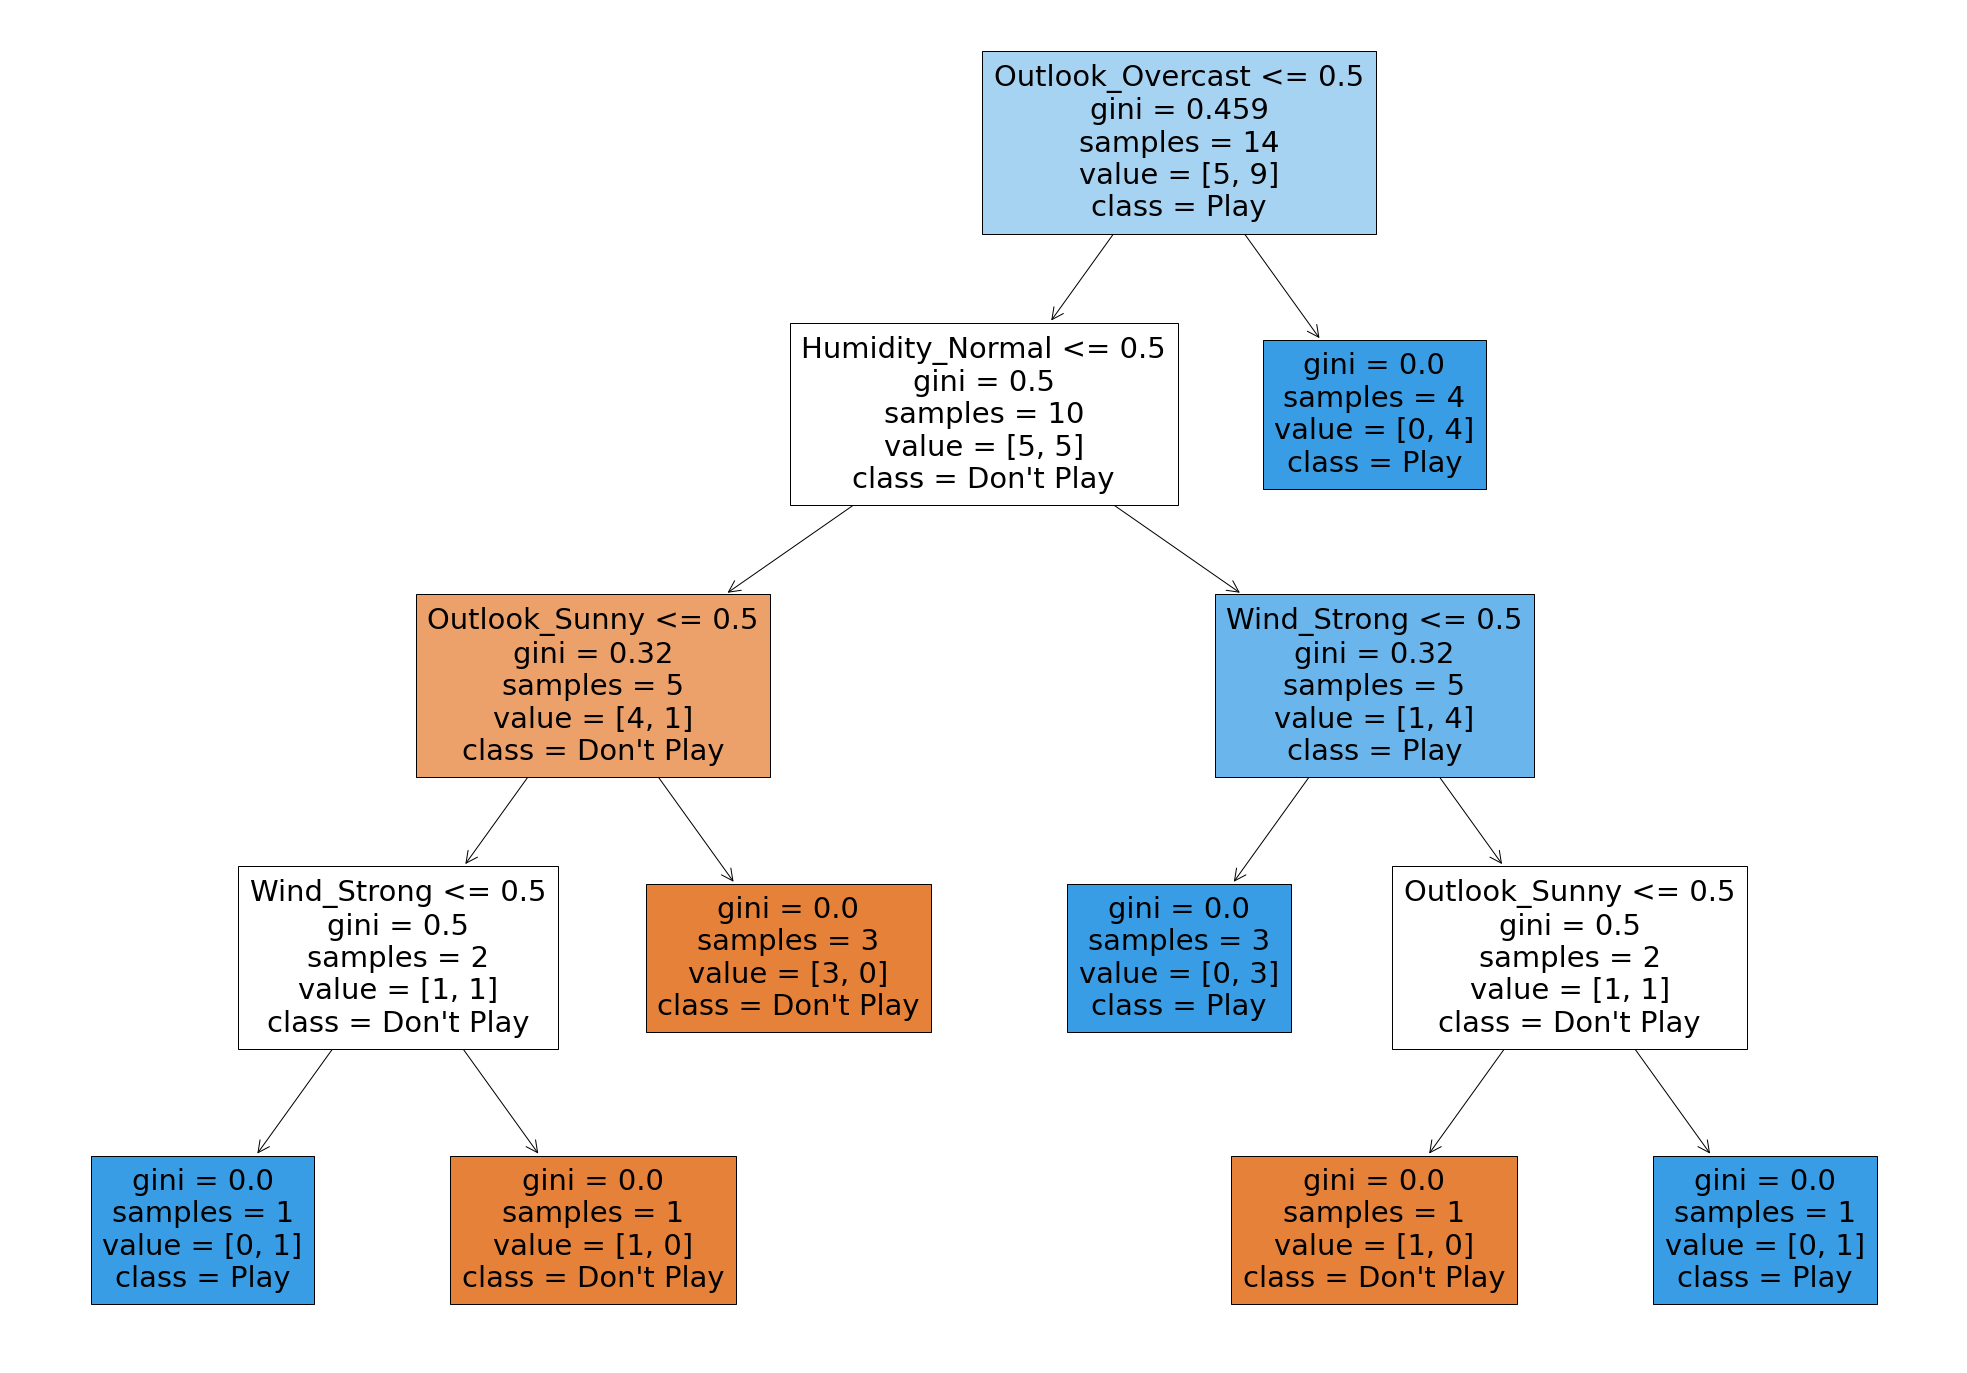

In [146]:
fig = plt.figure(figsize=(35,25))

tree.plot_tree(model_dt, feature_names=list(df.columns[1:].values), class_names=["Don't Play",'Play'],filled=True)

fig.savefig('golf_dt.png')
